<a href="https://colab.research.google.com/github/jqzba/Thesis/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-011763301665>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


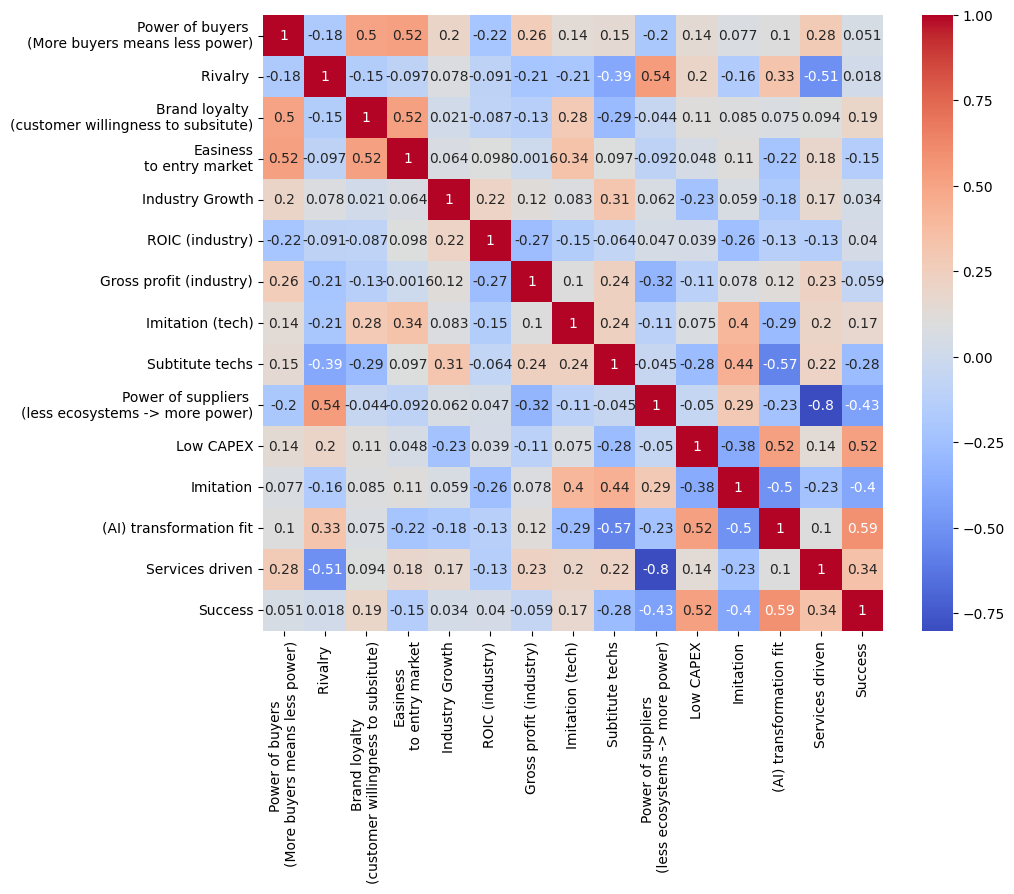

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from an Excel file
df = pd.read_excel('/content/test_f.xlsx')

# Calculate the correlation matrix
correlation = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

<ipython-input-2-e75c51c77220>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Success'].drop('Success')


Power of buyers \n(More buyers means less power)        0.051052
Rivalry                                                 0.017987
Brand loyalty \n(customer willingness to subsitute)     0.194839
Easiness\nto entry market                              -0.145885
Industry Growth                                         0.034446
ROIC (industry)                                         0.039684
Gross profit (industry)                                -0.058550
Imitation (tech)                                        0.169600
Subtitute techs                                        -0.276956
Power of suppliers \n(less ecosystems -> more power)   -0.427141
Low CAPEX                                               0.517045
Imitation                                              -0.400566
(AI) transformation fit                                 0.587556
Services driven                                         0.342475
Name: Success, dtype: float64


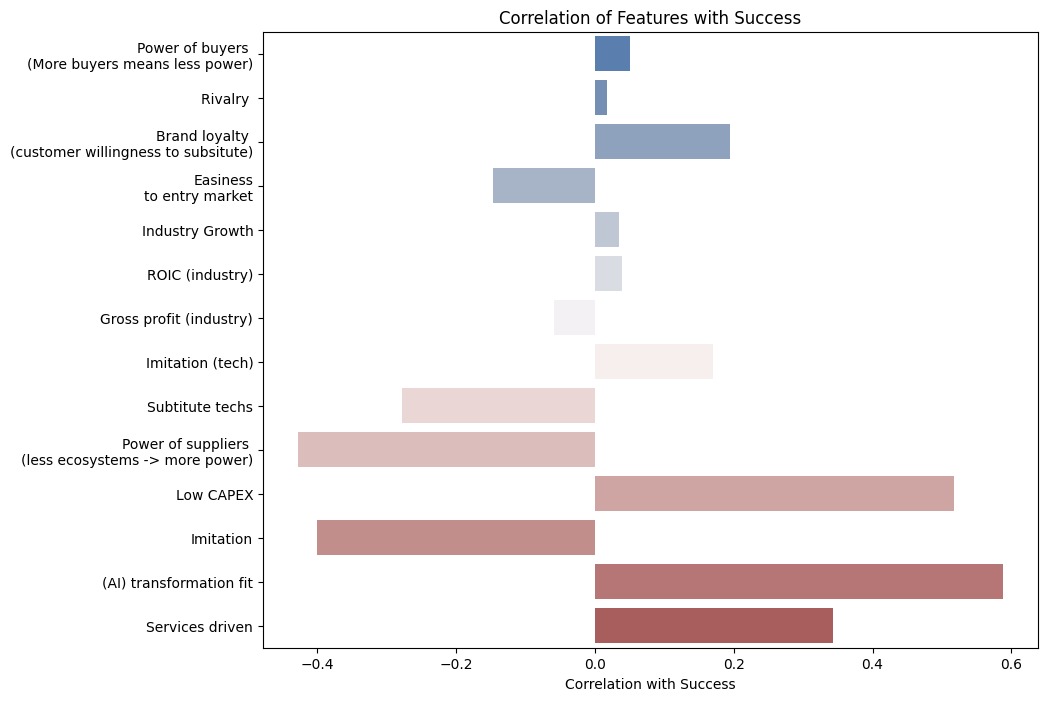

In [ ]:
# Calculate the correlation with 'Success'
correlation = df.corr()['Success'].drop('Success')

# Create a bar plot of the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette="vlag")

# Set plot labels
plt.xlabel('Correlation with Success')
plt.title('Correlation of Features with Success')

print(correlation)

# Display the plot
plt.show()

(AI) transformation fit                                 0.243494
Low CAPEX                                               0.157961
Industry Growth                                         0.106457
Gross profit (industry)                                 0.089422
Imitation (tech)                                        0.076318
Power of suppliers \n(less ecosystems -> more power)    0.068255
Rivalry                                                 0.047650
Imitation                                               0.040655
Brand loyalty \n(customer willingness to subsitute)     0.038788
Easiness\nto entry market                               0.037737
ROIC (industry)                                         0.035548
Subtitute techs                                         0.023035
Power of buyers \n(More buyers means less power)        0.019120
Services driven                                         0.015561
dtype: float64


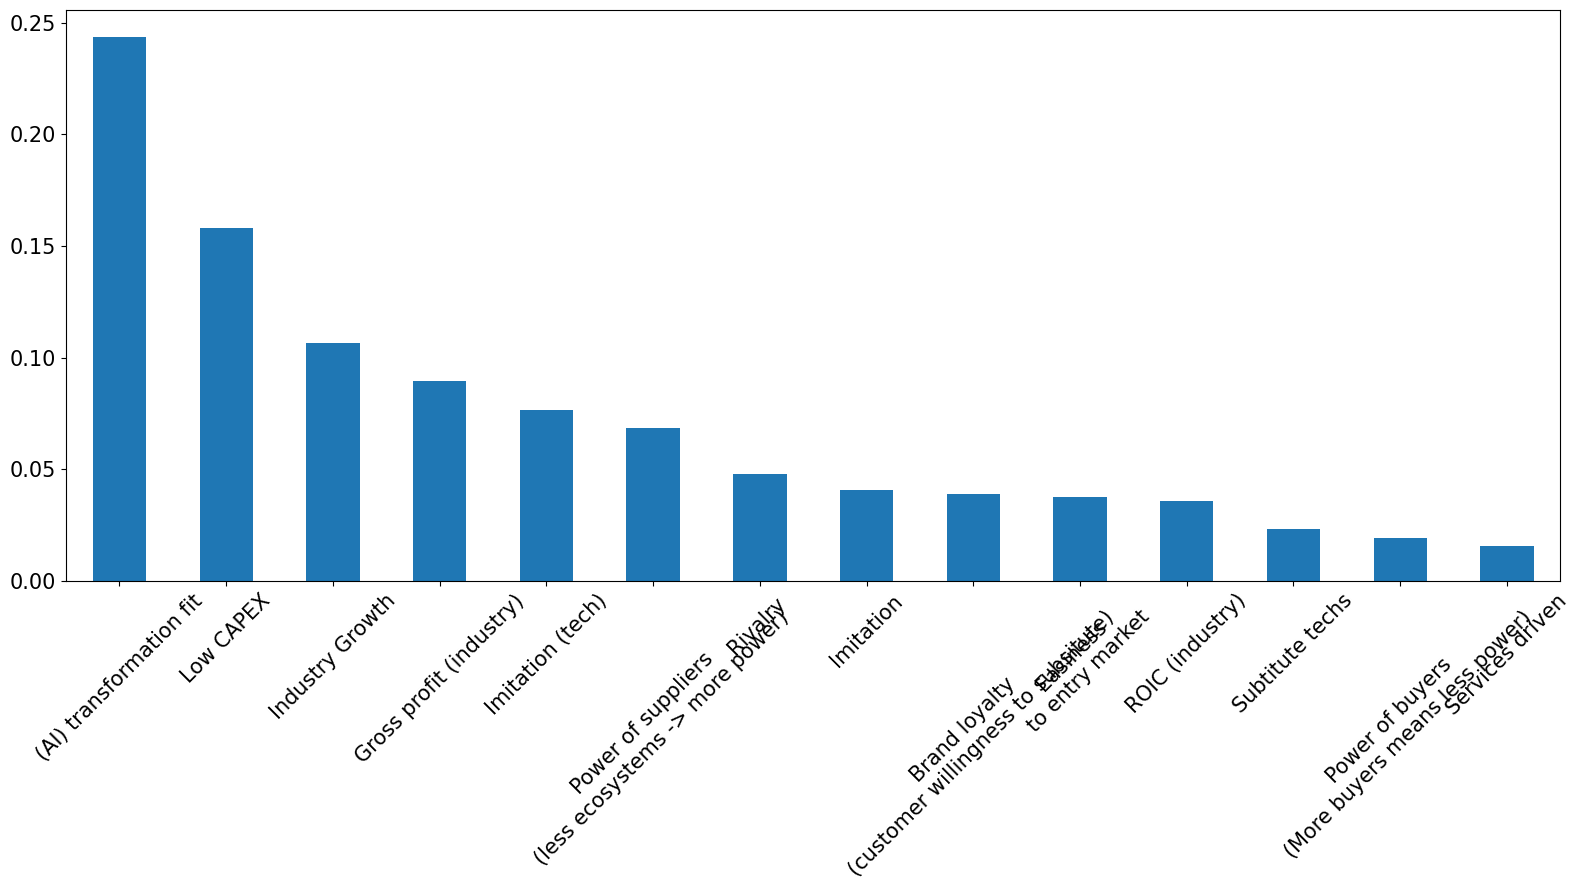

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Define the features and the target
features = df.columns.difference(['Success'])

# Select only numeric columns
df = df.select_dtypes(include=['number'])
X = df[features]
y = df['Success']

# Create a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)



# Train the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, features)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)
print(f_importances)
# Make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()